<a href="https://colab.research.google.com/github/ateachment/Moodle-KI/blob/main/xor_learning_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import tensorflow as tf
import numpy as np
import os.path
import matplotlib.pyplot as plt

In [14]:
# Callback, um die Fehlerwerte für jede Epoche zu sammeln und zu plotten
class PlotCallback(tf.keras.callbacks.Callback):
    def __init__(self):
        self.losses = []
        super().__init__()

    def on_epoch_end(self, epoch, logs=None):
        loss = logs['loss']
        self.losses.append(loss)

    def on_train_end(self, logs=None):
        plt.plot(self.losses)
        plt.xlabel('Epochen')
        plt.ylabel('Quadratischer Fehler')
        plt.show()

In [15]:
OVERWRITE_MODEL = True # True: Modell wird überschrieben
EPOCHS = 500 # Anzahl Iterationen (0: kein Training)
MODEL_NAME = "xor.model" # Für Speicherung

Epoch 1/500
1/1 [==============================] - 1s 717ms/step - loss: 1.3566
Epoch 2/500
1/1 [==============================] - 0s 12ms/step - loss: 0.4874
Epoch 3/500
1/1 [==============================] - 0s 9ms/step - loss: 0.3204
Epoch 4/500
1/1 [==============================] - 0s 7ms/step - loss: 0.2838
Epoch 5/500
1/1 [==============================] - 0s 11ms/step - loss: 0.2677
Epoch 6/500
1/1 [==============================] - 0s 9ms/step - loss: 0.2573
Epoch 7/500
1/1 [==============================] - 0s 10ms/step - loss: 0.2500
Epoch 8/500
1/1 [==============================] - 0s 7ms/step - loss: 0.2446
Epoch 9/500
1/1 [==============================] - 0s 8ms/step - loss: 0.2404
Epoch 10/500
1/1 [==============================] - 0s 6ms/step - loss: 0.2369
Epoch 11/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2339
Epoch 12/500
1/1 [==============================] - 0s 5ms/step - loss: 0.2311
Epoch 13/500
1/1 [==============================] - 0s 5

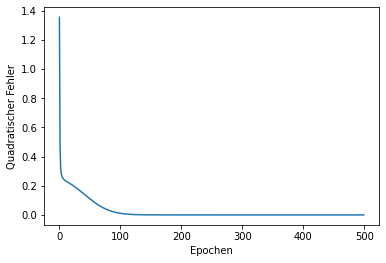

1/1 [==============================] - 0s 51ms/step
[[0.99999917]]


In [16]:
if os.path.exists(MODEL_NAME) and not OVERWRITE_MODEL:
    model = tf.keras.models.load_model(MODEL_NAME)
else:
    model = tf.keras.models.Sequential((
        tf.keras.layers.Input((2,)), # Input Layer mit Input-Dimension: (2,)
        tf.keras.layers.Dense(3, activation=tf.keras.activations.tanh), # Hidden Layer (3 Neuronen) mit Aktivierungsfunktion
        tf.keras.layers.Dense(1) # Output Layer (1 Neuron)
    ))

if EPOCHS > 0:
    x_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]) # NumPy-Arrays verschnellern den Lernprozess wesentlich
    y_train = np.array([[0], [1], [1], [0]])

    model.compile(loss=tf.losses.mean_squared_error, # loss (loss-function): Funktion zur Berechnung des Fehlers
                  optimizer=tf.optimizers.SGD(learning_rate=0.2)) # optimizer: Funktion zur Anpassung der Gewichte (SGD = Stochastic gradient descent)

    model.fit(x_train, # Inputs
              y_train, # Erwartete Outputs
              epochs=EPOCHS, # Anzahl Iterationen
              callbacks=[PlotCallback()]) # Callback für plotting
    if OVERWRITE_MODEL == False:
      if input('save? (y/n) ').lower() == 'y':
          model.save(MODEL_NAME)

pred = model.predict([[0, 1]]) # Vorhersage
print(pred)